In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [58]:
metric=pd.read_csv("COMPAS3_metric.csv")
metric=metric.replace('subgroup-fair','Subgroup-Fair')
metric=metric.replace('instant-fair','Instant-Fair')
metric=metric.reindex(index=[0,2,1]+[*range(3,metric.shape[0])])
fig = px.scatter_ternary(metric, a="IND", b="SP", c="SF", hover_name="type",
color="type", size=[2]*150,size_max=10,color_discrete_map = {"COMPAS": "red", "Subgroup-Fair": "blue","Instant-Fair":"green"},
labels={'type':'Types of Scores'})

fig.update_layout(
    font=dict(
        size=18,
    )
)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
fig.show()
fig.write_image("compas_metric.pdf")

<ipython-input-36-8995642a8047>:34: UserWarning:

FixedFormatter should only be used together with FixedLocator



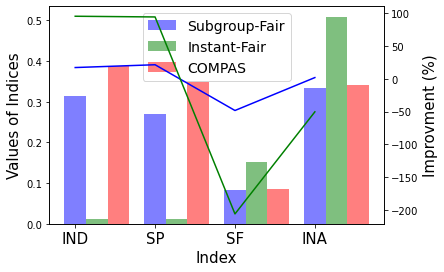

In [36]:
improve=pd.read_csv("COMPAS3_improve.csv")

sub=metric[metric['type']=='Subgroup-Fair'][['IND','SP','SF','INA']].mean()
ins=metric[metric['type']=='Instant-Fair'][['IND','SP','SF','INA']].mean()
comp=metric[metric['type']=='COMPAS'][['IND','SP','SF','INA']].mean()

index = ['IND','SP','SF','INA']
ind=np.arange(4)
width = 0.27 

fig, ax1 = plt.subplots()

#画柱状图
zvals = [1,2,3]
ax1.bar(ind,sub[index], width, alpha=0.5,label='Subgroup-Fair',color='blue')
kvals = [11,12,13]
ax1.bar(ind+width, ins[index], width , alpha=0.5,label='Instant-Fair',color='green')
yvals = [4, 9, 2]
ax1.bar(ind+width*2,comp[index], width ,alpha=0.5,label='COMPAS',color='red')
ax1.set_xlabel('Index',size=15)
#ax1.set_xticklabels(fontsize=15)
ax1.legend(fontsize=14)
#显示左侧纵坐标
ax1.set_ylabel('Values of Indices', color='black',size=15)

#新建右侧纵坐标画板
ax2 = ax1.twinx()
#画曲线
ax2.plot(index,improve[improve['type']=='subgroup-fair'][index].mean()*100, 'blue')
ax2.plot(index,improve[improve['type']=='instant-fair'][index].mean()*100, 'green')
#显示右侧纵坐标
ax2.set_ylabel('Improvment (%)', color='black',size=15)

ax1.set_xticklabels(index, fontsize=15)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig("compas_improve.pdf",bbox_inches='tight')